In [13]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('FinalData.csv', sep = ';', na_values = 'NaN')

# Data Processing

In [15]:
df.ocena = df.ocena.str.replace(',','.')
df.ocena = df.ocena.astype(np.float64)
df.long = df.long.astype(np.float64)
df.ilosc_recenzji = df.ilosc_recenzji.astype(np.float64)
df['facebook'] = np.float64(df.strona_internetowa.str.contains('facebook').fillna(False))
df.accessibility = np.float64(df.accessibility.str.contains('Wheelchair').fillna(False)) #Niepelnosprawnosc

In [16]:
"""hours_columns = ['open_hours_monday', 'close_monay', 'tuesday', 'close_tue', 'wednesday',
                 'closed_wed', 'thursday', 'closed_thu', 'friday', 'closed_fri',
                 'saturday', 'closed_sat', 'sunday', 'closed_sun']


for column in hours_columns:
    new_column = []
    for el in df[column]:
        try:
            new_column.append(time.strptime(el, '%H:%M:%S').tm_hour)
        except:
            new_column.append(np.nan)
    df[column] = new_column"""
print()

In [17]:
hours_columns = [['open_hours_monday', 'close_monay'],
                 ['tuesday', 'close_tue'],
                 ['wednesday','closed_wed'],
                 ['thursday', 'closed_thu'],
                 ['friday', 'closed_fri'],
                 ['saturday', 'closed_sat'],
                 ['sunday', 'closed_sun']]

columnsToDrop = ['open_hours_monday', 'close_monay', 'tuesday', 'close_tue', 'wednesday',
                 'closed_wed', 'thursday', 'closed_thu', 'friday', 'closed_fri',
                 'saturday', 'closed_sat', 'sunday', 'closed_sun']

for pair_column in hours_columns:
    temp = []
    for column in pair_column:
        new_column = []
        for el in df[column]:
            try:
                new_column.append(time.strptime(el, '%H:%M:%S').tm_hour)
            except:
                new_column.append(np.nan)
        new_column = np.array(new_column)
        temp.append(new_column)
    wyjsciowaIloscGodzin = temp[1] - temp[0]
    roznicaDni = 24*np.float64(wyjsciowaIloscGodzin<0)
    toReturn = wyjsciowaIloscGodzin + roznicaDni
    whereAreNan = np.isnan(toReturn)
    toReturn[whereAreNan] = 0
    
    day = pair_column[1].split('_')
    name = 'Working_hour_' + day[1]
    
    df[name] = toReturn
    
df = df.drop(columnsToDrop, axis = 1)

D:\Games\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less


In [18]:
def make_dummy_variable(df, column):
    df[column] = df[column].str.lower()

    a = [el.split(',') for el in df[column].unique() if type(el) == str]
    b = [el for lista in a for el in lista]
    c = [el[1:] if el.startswith(' ') else el for el in b]
    d = [el[:-1] if el.endswith(' ') else el for el in c]
    unique = list(set(d))
    print(unique)

    for el in unique:
        df[el] = np.float64(df[column].str.contains(el).fillna(False)) 
    return df

In [19]:
to_change = ['Offerings', 'highlights', 'Dining_options', 'Amenities', 'Atmosphere', 'Crowd', 'Payments']

for el in to_change:
    df = make_dummy_variable(df, el)

to_drop = to_change + ['nan']
df = df.drop(to_drop, axis = 1)

['late-night food', 'all you can eat', 'vegan', 'salad bar', 'halal food', "kids' menu", 'salad', 'eko', 'wine', 'vegetarian options', 'organic dishes', 'beer', 'happy hour food']
['bar games', 'sport', 'garden', 'great cocktails', 'women-led', 'outdoor seating', 'karaoke', 'live music', 'fireplace']
['lunch', 'dessert', 'toilet', 'seating', 'good for kids', 'supper', 'catering', 'dinner', 'delivery', 'breakfast', ' supper']
['toilet', 'good for kids', 'do_karmienia', 'wi-fi', 'high chairs', 'bar onsite']
['cosy', 'trending', 'casual']
['family friendly', 'groups']
['nan', 'nfc', 'debit card', 'reservations required', 'credit cards', 'cash']


In [20]:
df.head()

,nazwa,adres,strona_internetowa,lat,long,ocena,ilosc_recenzji,accessibility,czy_sieciowka,facebook,...,cosy,trending,casual,family friendly,groups,nfc,debit card,reservations required,credit cards,cash
0,Pijalnia Wódki i Piwa,"Rynek 13/14, 50-101 Wrocław",NaN,51.110446,17.032568,4.2,537.0,1.0,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Forma Plynna,"wybrzeże Stanisława Wyspiańskiego 20, 50-370 W...",https://www.facebook.com/FormaPlynna/,51.107954,17.057186,4.6,303.0,0.0,0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Pizzeria Bravo,"plac Grunwaldzki 18, 48-300 Wrocław",http://www.bravo.wroclaw.pl/,51.111057,17.057905,4.0,587.0,1.0,0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Warzywniak,"plac Grunwaldzki 18-20, 50-348 Wrocław",NaN,51.111057,17.057905,4.6,170.0,1.0,0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,Remont Bar,"plac Grunwaldzki 18, 48-300 Wrocław",https://www.facebook.com/Bar.Remont,51.111210,17.058386,4.4,374.0,1.0,0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df.describe()

,lat,long,ocena,ilosc_recenzji,accessibility,czy_sieciowka,facebook,Working_hour_monay,Working_hour_tue,Working_hour_wed,...,cosy,trending,casual,family friendly,groups,nfc,debit card,reservations required,credit cards,cash
count,222.000000,222.000000,222.000000,222.000000,222.00000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,51.109168,17.032141,4.009009,147.873874,0.50000,0.324324,0.184685,9.256757,9.734234,9.815315,...,0.522523,0.018018,0.815315,0.121622,0.540541,0.022523,0.157658,0.004505,0.013514,0.022523
std,0.021751,0.033798,0.702426,182.625826,0.50113,0.469180,0.388918,4.097436,3.515525,3.391117,...,0.500621,0.133317,0.388918,0.327587,0.499480,0.148711,0.365243,0.067116,0.115720,0.148711
min,51.030323,16.962195,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.101322,17.012245,3.700000,27.000000,0.00000,0.000000,0.000000,8.250000,9.000000,9.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.113294,17.034007,4.200000,86.500000,0.50000,0.000000,0.000000,10.000000,10.000000,10.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.120933,17.051558,4.500000,187.500000,1.00000,1.000000,0.000000,12.000000,12.000000,12.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,51.150938,17.120709,5.000000,1122.000000,1.00000,1.000000,1.000000,23.000000,23.000000,23.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
odleglosci2 = []

for index, row1 in df.iterrows():
    odleglosci2.extend(np.sqrt((row1.long - df.long)**2 + (row1.lat - df.lat)**2).values.tolist())
    
odleglosci2 = [el for el in odleglosci2 if el!= 0]

kwantyle = np.percentile(odleglosci2, [10, 40, 75])

In [23]:
kolumny = [[],[],[]]

for index, row1 in df.iterrows():
    odleglosci_od_innych_lokali = np.sqrt((row1.long - df.long)**2 + (row1.lat - df.lat)**2).values.tolist() 
    for i in range(3):
        kolumny[i].append(np.sum(odleglosci_od_innych_lokali <= kwantyle[i]))
        
odleglosci = pd.DataFrame(data = {'blisko':kolumny[0],'srednio':kolumny[1],'daleko':kolumny[2]})
df = pd.concat([df, odleglosci], axis = 1)

# Analysis

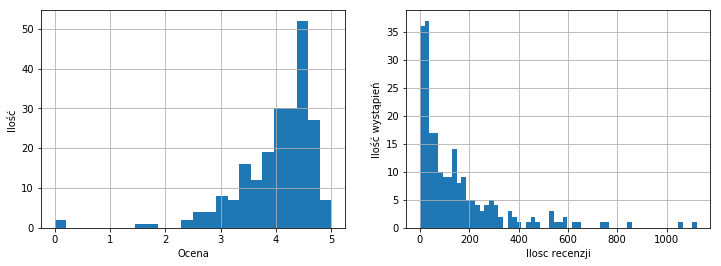

In [25]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
df.ocena.hist(bins = 24)
plt.xlabel('Ocena')
plt.ylabel('Ilość')

plt.subplot(1,2,2)
df.ilosc_recenzji.hist(bins = 60)
plt.xlabel('Ilosc recenzji')
plt.ylabel('Ilość wystąpień')

plt.show()

In [26]:
df['dobry_lokal'] = np.float64(np.logical_and(df.ilosc_recenzji > 150, df.ocena >= 4.4))
df.dobry_lokal.sum()

35.0

In [27]:
df['dobry_lokal2'] = np.float64(np.logical_or(df.ilosc_recenzji > 300, np.logical_and(df.ilosc_recenzji >= 50, df.ocena >= 4.5)))
df.dobry_lokal2.sum()

61.0

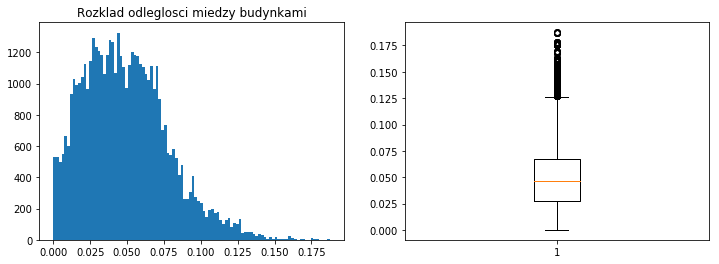

In [28]:
plt.figure(figsize = (12, 4))

plt.subplot(1,2,1)
plt.hist(odleglosci2, bins = 100)
plt.title('Rozklad odleglosci miedzy budynkami')

plt.subplot(1,2,2)
plt.boxplot(odleglosci2)

plt.show()

Korelacje

In [29]:
korelacje = df.corr()[['ilosc_recenzji', 'ocena', 'dobry_lokal', 'dobry_lokal2']]
for idx, row in korelacje[abs(korelacje) > 0.3].iterrows():
    if not row.isnull().all():
        print(row.name, row.ilosc_recenzji, row.ocena, row.dobry_lokal, row.dobry_lokal2)

ocena nan 1.0 0.324250742383 0.403870008111
ilosc_recenzji 1.0 nan 0.475290522185 0.620165594286
good for kids nan nan nan 0.313843849716
cosy nan 0.353279491901 0.339318778872 0.345981063864
groups 0.300763200193 nan nan nan
dobry_lokal 0.475290522185 0.324250742383 1.0 0.564398567208
dobry_lokal2 0.620165594286 0.403870008111 0.564398567208 1.0


Skorelowanie:
- Good for kids z dobry_lokal
- Cosy z ilość recenzji
- Groups z ocena

In [42]:
a = df.groupby('dobry_lokal').mean()

for col in a.columns:
    print('{:6.2f} {:6.2f} {}'.format(a[col][0], a[col][1], col))

 51.11  51.11 lat
 17.03  17.05 long
  3.91   4.53 ocena
110.41 348.06 ilosc_recenzji
  0.51   0.46 accessibility
  0.36   0.14 czy_sieciowka
  0.15   0.37 facebook
  9.26   9.23 Working_hour_monay
  9.66  10.11 Working_hour_tue
  9.76  10.11 Working_hour_wed
  9.78  10.23 Working_hour_thu
  9.89  10.74 Working_hour_fri
  8.94  10.49 Working_hour_sat
  7.92   9.77 Working_hour_sun
  0.16   0.17 late-night food
  0.02   0.00 all you can eat
  0.03   0.09 vegan
  0.01   0.00 salad bar
  0.01   0.06 halal food
  0.13   0.23 kids' menu
  0.04   0.00 salad
  0.01   0.00 eko
  0.14   0.40 wine
  0.10   0.26 vegetarian options
  0.02   0.03 organic dishes
  0.20   0.49 beer
  0.01   0.03 happy hour food
  0.01   0.06 bar games
  0.00   0.03 sport
  0.03   0.00 garden
  0.06   0.29 great cocktails
  0.01   0.00 women-led
  0.05   0.11 outdoor seating
  0.01   0.00 karaoke
  0.03   0.06 live music
  0.02   0.06 fireplace
  0.08   0.17 lunch
  0.12   0.09 dessert
  0.16   0.29 toilet
  0.05   0.

In [41]:
a = df.groupby('dobry_lokal2').mean()

for col in a.columns:
    print('{:6.2f} {:6.2f} {}'.format(a[col][0], a[col][1], col))

 51.11  51.11 lat
 17.03  17.04 long
  3.83   4.47 ocena
 78.32 331.46 ilosc_recenzji
  0.46   0.61 accessibility
  0.35   0.25 czy_sieciowka
  0.14   0.30 facebook
  9.29   9.16 Working_hour_monay
  9.64   9.98 Working_hour_tue
  9.70  10.13 Working_hour_wed
  9.72  10.20 Working_hour_thu
  9.84  10.49 Working_hour_fri
  8.95   9.80 Working_hour_sat
  7.94   8.93 Working_hour_sun
  0.14   0.21 late-night food
  0.02   0.00 all you can eat
  0.02   0.08 vegan
  0.01   0.02 salad bar
  0.01   0.05 halal food
  0.11   0.23 kids' menu
  0.04   0.02 salad
  0.01   0.00 eko
  0.15   0.28 wine
  0.09   0.20 vegetarian options
  0.02   0.03 organic dishes
  0.19   0.39 beer
  0.01   0.02 happy hour food
  0.01   0.03 bar games
  0.00   0.02 sport
  0.02   0.03 garden
  0.04   0.23 great cocktails
  0.01   0.00 women-led
  0.04   0.11 outdoor seating
  0.01   0.00 karaoke
  0.02   0.07 live music
  0.02   0.05 fireplace
  0.07   0.16 lunch
  0.09   0.18 dessert
  0.12   0.33 toilet
  0.05   0.

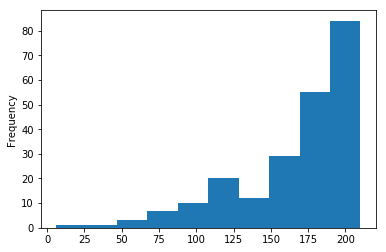

In [32]:
df.daleko.plot(kind = 'hist')
plt.show()

# Models

### Regresja

In [60]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

D:\Games\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
df2 = df.drop(['nazwa', 'adres', 'strona_internetowa', 'lat', 'long'], axis = 1)

In [27]:
df2 = df2.dropna()

In [28]:
Y = df2.ocena.values
X = df2.drop(['ocena'], axis = 1).values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [31]:
modele = [DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]

In [32]:
for model in modele:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    print(model.__class__.__name__)
    print(model)
    print('MSE = ', mse)
    print('-'*30)

DecisionTreeRegressor
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
MSE =  0.625111111111
------------------------------
RandomForestRegressor
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
MSE =  0.30936
------------------------------
GradientBoostingRegressor
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_f

### Klasyfikacja

In [46]:
df3 = df.fillna(0)

In [61]:
Y = df3.dobry_lokal2
X = df3.drop(['ocena', 'nazwa', 'adres', 'strona_internetowa', 
             'lat', 'long', 'ilosc_recenzji', 'dobry_lokal','dobry_lokal2'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [63]:
modele = [DecisionTreeClassifier(), RandomForestClassifier(n_estimators = 100), GradientBoostingClassifier()]

In [64]:
wybraneCechy = []

for model in modele:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    res_cv = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'precision')
    
    print(model.__class__.__name__)
    #print(model)
    print('Accuracy = ', accuracy)
    print('ROC AUC = ', roc)
    print('Cross Validation = ', np.mean(res_cv))
    wazneCechy = pd.DataFrame({'cechy':X.columns, 'wazne':np.round(model.feature_importances_, 3)})
    wazneCechy = wazneCechy.sort_values('wazne', ascending = False)
    wazneCechy = wazneCechy.head(5)
    wybraneCechy.extend(wazneCechy.cechy.values.tolist())
    print(wazneCechy)
    print('-'*30)

DecisionTreeClassifier
Accuracy =  0.755555555556
ROC AUC =  0.645432692308
Cross Validation =  0.44
               cechy  wazne
59           srednio  0.280
58            daleko  0.148
57            blisko  0.137
47              cosy  0.106
5   Working_hour_wed  0.053
------------------------------


D:\Games\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RandomForestClassifier
Accuracy =  0.711111111111
ROC AUC =  0.545673076923
Cross Validation =  0.375
               cechy  wazne
59           srednio  0.104
58            daleko  0.100
57            blisko  0.084
8   Working_hour_sat  0.048
47              cosy  0.047
------------------------------
GradientBoostingClassifier
Accuracy =  0.733333333333
ROC AUC =  0.629807692308
Cross Validation =  0.403571428571
               cechy  wazne
59           srednio  0.192
58            daleko  0.144
57            blisko  0.120
9   Working_hour_sun  0.075
8   Working_hour_sat  0.060
------------------------------


In [55]:
list(set(wybraneCechy))

['cosy', 'srednio', 'daleko', 'blisko', 'Working_hour_sat', 'Working_hour_sun']

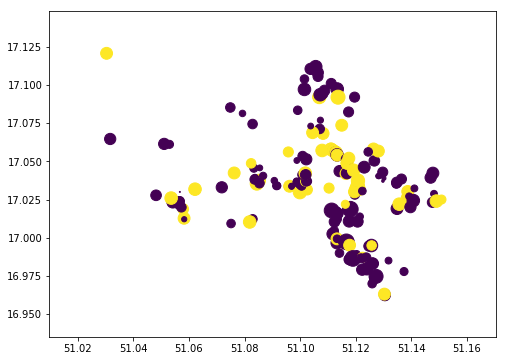

In [56]:
plt.figure(figsize = (8,6))

x = df.lat
y = df.long

plt.scatter(x,y, c = df.dobry_lokal2, s = np.exp(1.1*df.ocena))
plt.show()

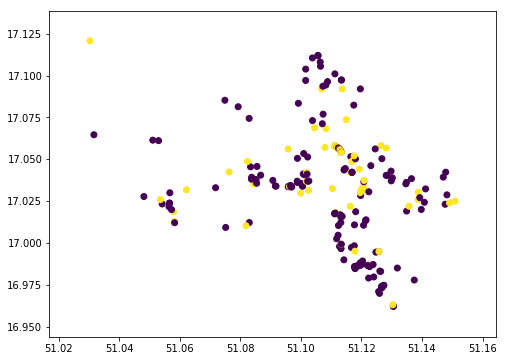

In [57]:
plt.figure(figsize = (8,6))

x = df.lat
y = df.long

plt.scatter(x,y, c = df.dobry_lokal2)
plt.show()

Metoda centroidów do wyznaczenia jakiś potencjalnych dobrych lub słabych miejsc

In [43]:
from sklearn.cluster import KMeans

In [44]:
toCluster = df.drop(['nazwa', 'adres', 'strona_internetowa'], axis = 1).dropna()

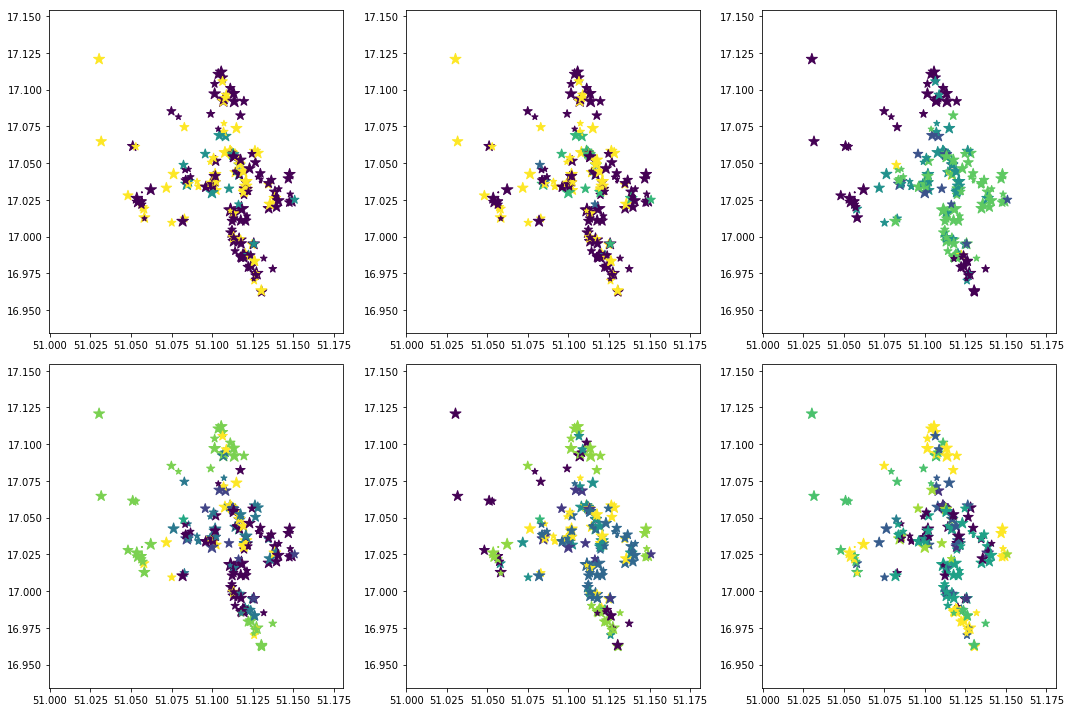

In [45]:
labele = []
plt.figure(figsize = (15,10))

for i in range(3,9):
    means = KMeans(n_clusters = i)
    means.fit(toCluster)
    labele.append(means.labels_)
    plt.subplot(2,3,i-2)
    plt.scatter(toCluster.lat,toCluster.long, marker = '*', c = means.labels_, s = 1.5*np.exp(toCluster.ocena))
    #plt.scatter(x,y, marker = 'o', s = 3, c = df.dobry_lokal2)
    
plt.tight_layout()
plt.show()

In [46]:
daneZlabelami = pd.concat([toCluster, pd.Series(labele[1], index = toCluster.index)], axis = 1)

In [ ]:
daneZlabelami[daneZlabelami == 0]

In [10]:
a = df[['nazwa', 'long', 'lat', 'ocena', 'ilosc_recenzji', 'adres']]
a.index = df.nazwa
a = a.drop('nazwa', axis = 1)
a.to_csv('Data.csv', encoding = 'utf-8', sep = ';')

In [9]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, Pijalnia Wódki i Piwa to Resstaurant LOT Kitchen
Data columns (total 5 columns):
long              222 non-null float64
lat               222 non-null float64
ocena             222 non-null float64
ilosc_recenzji    222 non-null float64
adres             222 non-null object
dtypes: float64(4), object(1)
memory usage: 10.4+ KB
